# Part 3 - Feature Creation

### This Watson Studio Notebook is split into two parts. Data Cleansing and Feature Engineering.

#### Import the libraries

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import Normalizer
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline
%matplotlib inline

## Importing the Datset into Pandas and Spark Dataframes using IBM's codesnippets

In [1]:
# The code was removed by Watson Studio for sharing.

[Row(Time='0', V1='-1.3598071336738', V2='-0.0727811733098497', V3='2.53634673796914', V4='1.37815522427443', V5='-0.338320769942518', V6='0.462387777762292', V7='0.239598554061257', V8='0.0986979012610507', V9='0.363786969611213', V10='0.0907941719789316', V11='-0.551599533260813', V12='-0.617800855762348', V13='-0.991389847235408', V14='-0.311169353699879', V15='1.46817697209427', V16='-0.470400525259478', V17='0.207971241929242', V18='0.0257905801985591', V19='0.403992960255733', V20='0.251412098239705', V21='-0.018306777944153', V22='0.277837575558899', V23='-0.110473910188767', V24='0.0669280749146731', V25='0.128539358273528', V26='-0.189114843888824', V27='0.133558376740387', V28='-0.0210530534538215', Amount='149.62', Class='0'),
 Row(Time='0', V1='1.19185711131486', V2='0.26615071205963', V3='0.16648011335321', V4='0.448154078460911', V5='0.0600176492822243', V6='-0.0823608088155687', V7='-0.0788029833323113', V8='0.0851016549148104', V9='-0.255425128109186', V10='-0.166974414

In [8]:
# The code was removed by Watson Studio for sharing.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### Creating a temporary view in order to call SQL queries to the spark dataframe object.

In [3]:
df_data_2.createOrReplaceTempView("df")

### I. Data Cleansing

A. Data Types 
   
* Are data types of columns matching their content? - Yes it does although we had to specify this as an option in the scala code to import this **.option("inferSchema","true")** 

B. Ranges 

* Does the value distribution of values in column make sense?

C.Emptiness

* Are all values non-null where mandatory

D. Uniqueness

* Are duplicates present where undesired? This is Not Applicable to our dataset.

E. Set Membership
* Are only allowed values chosen for categorical or ordinal fields? The values of Class where 1 is Fraudulent and the other is not has been already chosen.

F. Regular Expressions (RegExes)

* Some files need to stick to a pattern expressed by a regular expression. Not applicable to our data set.

G. Cross-Field Validation

* Some fields can impact the validity of other fields.

In [4]:
df_data_2.describe("Time","Amount","Class").show()

+-------+------------------+------------------+--------------------+
|summary|              Time|            Amount|               Class|
+-------+------------------+------------------+--------------------+
|  count|            284807|            284807|              284807|
|   mean| 94813.85957508067|  88.3496192509508|0.001727485630620034|
| stddev|47488.145954566906|250.12010924018736| 0.04152718963546528|
|    min|                 0|                 0|                   0|
|    max|             99999|             999.9|                   1|
+-------+------------------+------------------+--------------------+



/tmp/ipykernel_341/952191769.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pd["Time"],ax=ax[0])
/tmp/ipykernel_341/952191769.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_pd["Amount"],ax = ax[1])


Text(0.5, 1.0, 'Distribution of Transaction Amount')

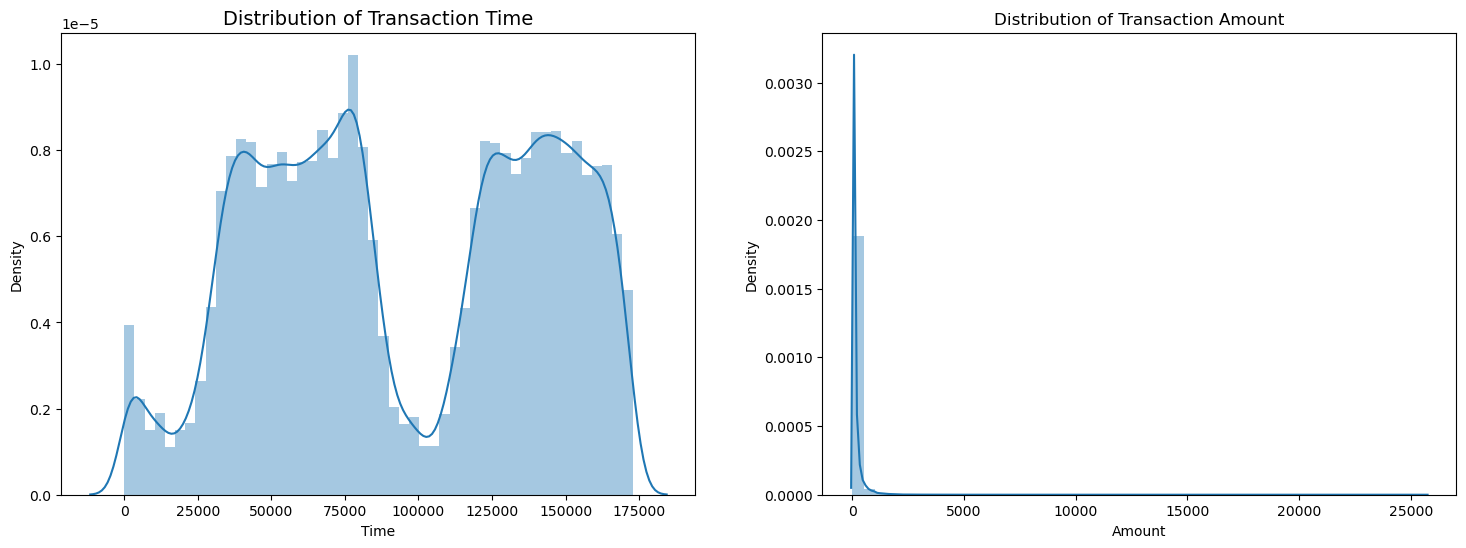

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , ax = plt.subplots(1,2, figsize=(18,6))
sns.distplot(df_pd["Time"],ax=ax[0])
ax[0].set_title('Distribution of Transaction Time', fontsize=14)


sns.distplot(df_pd["Amount"],ax = ax[1])
ax[1].set_title('Distribution of Transaction Amount')

The period of our dataset is two days. The distribution of our transactions are adequately grouped to peak at the day time and go down during the night time.

(0.0, 200.0)

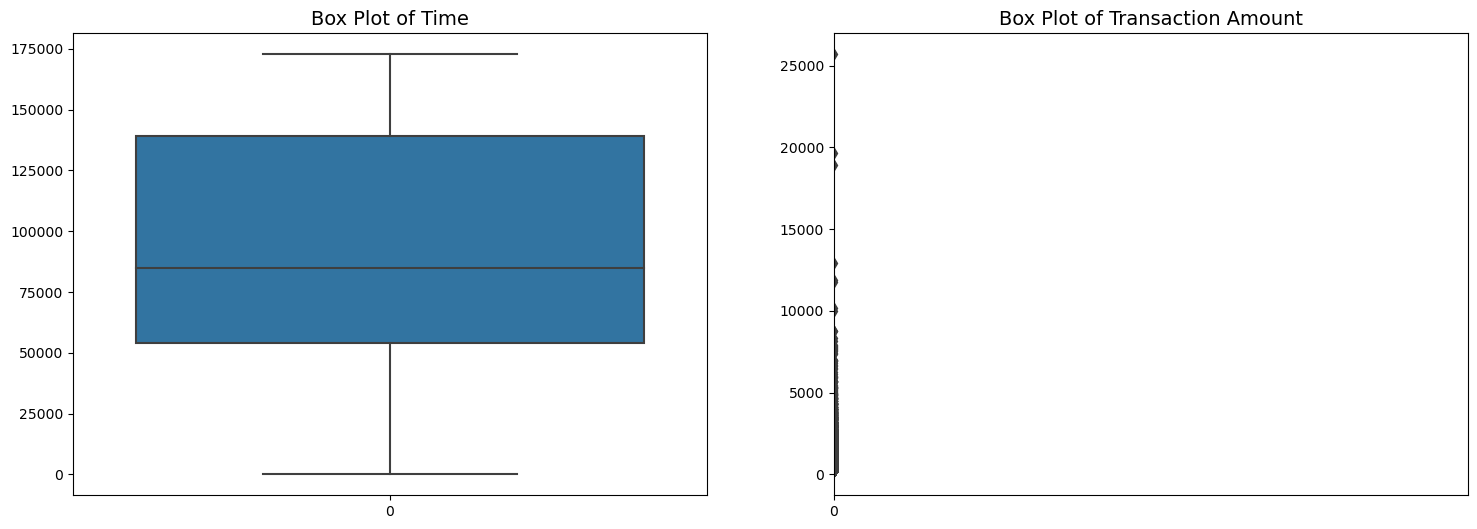

In [10]:
fig1, ax1 = plt.subplots(1,2, figsize=(18,6))
sns.boxplot(df_pd["Time"],orient='v',ax=ax1[0])
ax1[0].set_title("Box Plot of Time",fontsize=14)
sns.boxplot(df_pd["Amount"],ax =ax1[1])
ax1[1].set_title("Box Plot of Transaction Amount",fontsize = 14)
ax1[1].set_xlim(0,200)

In [11]:
spark.sql("select COUNT(TIME) From Df where Amount > 175 AND CLASS = 1").show()

+-----------+
|count(TIME)|
+-----------+
|         93|
+-----------+



In [12]:
spark.sql("select COUNT(TIME) From Df where Amount > 100 AND CLASS = 1").show()

+-----------+
|count(TIME)|
+-----------+
|        130|
+-----------+



In [13]:
spark.sql("select COUNT(TIME) FROM df Where AMOUNT = NULL AND TIME = NULL AND CLASS =NULL").show()

+-----------+
|count(TIME)|
+-----------+
|          0|
+-----------+



### II. Feature Creation/Engineering

In [14]:
feat = df_data_2.columns
feat.remove('Class')

In [17]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import Normalizer
from pyspark.mllib.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml import Pipeline

vectorAssembler = VectorAssembler(inputCols = feat, outputCol = "features")
normalizer = Normalizer(inputCol = "features", outputCol = "features_norm",p=1)
pipeline = Pipeline(stages =[vectorAssembler,normalizer])
df_feat = pipeline.fit(df_data_2)
df_feature = df_feat.transform(df_data_2)

df_feature.show()

IllegalArgumentException: Data type string of column Time is not supported.
Data type string of column V1 is not supported.
Data type string of column V2 is not supported.
Data type string of column V3 is not supported.
Data type string of column V4 is not supported.
Data type string of column V5 is not supported.
Data type string of column V6 is not supported.
Data type string of column V7 is not supported.
Data type string of column V8 is not supported.
Data type string of column V9 is not supported.
Data type string of column V10 is not supported.
Data type string of column V11 is not supported.
Data type string of column V12 is not supported.
Data type string of column V13 is not supported.
Data type string of column V14 is not supported.
Data type string of column V15 is not supported.
Data type string of column V16 is not supported.
Data type string of column V17 is not supported.
Data type string of column V18 is not supported.
Data type string of column V19 is not supported.
Data type string of column V20 is not supported.
Data type string of column V21 is not supported.
Data type string of column V22 is not supported.
Data type string of column V23 is not supported.
Data type string of column V24 is not supported.
Data type string of column V25 is not supported.
Data type string of column V26 is not supported.
Data type string of column V27 is not supported.
Data type string of column V28 is not supported.
Data type string of column Amount is not supported.

In [18]:
df_engin = df_feature.drop('Time').drop('Amount').drop('V1').drop('V2').drop('V3').drop('V4').drop('V5').drop('V6').drop('V7').drop('V8').drop('V9').drop('V9').drop('V10').drop('V11').drop('V12').drop('V13').drop('V14').drop('V15').drop('V16').drop('V17').drop('V18').drop('V19').drop('V20').drop('V21').drop('V22').drop('V23').drop('V24').drop('V25').drop('V26').drop('V27').drop('V28')

NameError: name 'df_feature' is not defined

In [19]:
df_engin = df_engin.withColumnRenamed("Class","label")

NameError: name 'df_engin' is not defined

In [20]:
df_engin.show()

NameError: name 'df_engin' is not defined

In [21]:
df_engin.write.parquet(cos.url('df_engin_label.parquet', 'advancedcourseracapstone-donotdelete-pr-evg4tugpydzysx'))

NameError: name 'df_engin' is not defined